In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("reviews.csv", sep=None, engine="python", on_bad_lines='skip')
df["rating_count"] = df["rating_count"].str.replace(",", "").astype(float)
df["rating"] = df["rating"].astype(float)

df["label"] = df["rating"].apply(lambda x: 1 if x >= 4 else 0)

In [2]:
# Fitur dan label
X = df[["rating_count"]]
y = df["label"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Latih model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [4]:
# Prediksi dan evaluasi
y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Confusion Matrix:
 [[ 1  1]
 [ 3 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.91      0.77      0.83        13

    accuracy                           0.73        15
   macro avg       0.58      0.63      0.58        15
weighted avg       0.82      0.73      0.77        15



Confusion Matrix:
 [[ 1  1]
 [ 3 10]]


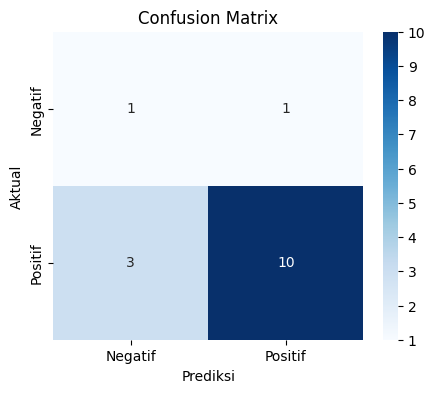

In [5]:
# Tambahan: Confusion Matrix (angka)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Tambahan: Visualisasi Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()